In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets, models,layers
from tensorflow import keras

In [2]:
(x_train,y_train), (x_test,y_test)=datasets.mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_train[0]

5

In [10]:
def showimage(x,y,index):
    plt.figure(figsize=(2,2))
    plt.matshow(x[index])
    plt.xlabel(y[index])

<Figure size 144x144 with 0 Axes>

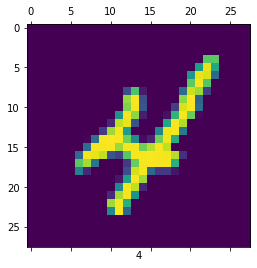

In [13]:
showimage(x_train,y_train,9)

In [14]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [15]:
x_train = x_train/255
x_test = x_test/255

In [35]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [36]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28,28,)),
    layers.Dense(100,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2703 - accuracy: 0.9239
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1217 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0841 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 2s 987us/step - loss: 0.0628 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0496 - accuracy: 0.9847


In [37]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 863us/step - loss: 0.0735 - accuracy: 0.9780


[0.07345707714557648, 0.9779999852180481]

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred= model.predict(x_test)
y_pred = [np.argmax(y) for y in y_pred]
print(classification_report(y_test,y_pred))
#print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.99      0.96      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [39]:
cnn = keras.Sequential([
    layers.Conv2D(input_shape=(28,28,1),filters=30,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(100,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1554 - accuracy: 0.9548
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0541 - accuracy: 0.9831
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0344 - accuracy: 0.9890
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0242 - accuracy: 0.9922
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0161 - accuracy: 0.9952
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0125 - accuracy: 0.9962
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0086 - accuracy: 0.9973
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0078 - accuracy: 0.9972
Epoch 9/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0055 - accuracy: 0.9982
Epoch 10/10
1875/1875 [==============================] - 20s 10ms

In [40]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0521 - accuracy: 0.9873


[0.052093952894210815, 0.9872999787330627]

In [41]:
y_pred=cnn.predict(x_test)

In [43]:
y_pred= [np.argmax(y) for y in y_pred] 

In [44]:
y_pred[:5]

[7, 2, 1, 0, 4]

In [45]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred= cnn.predict(x_test)
y_pred = [np.argmax(y) for y in y_pred]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 144x144 with 0 Axes>

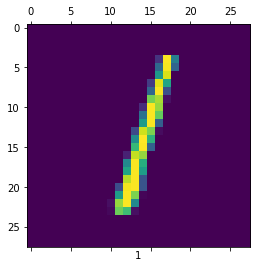

In [47]:
showimage(x_test,y_pred,2)